In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import geopandas as gpd
from geopandas.tools import sjoin
from matplotlib.offsetbox import AnchoredText
import matplotlib.cm
import matplotlib.colors as colors
import geoplot as gplt
import matplotlib.animation as animation

In [19]:
#Load in all raw data from the John Hopkins github page
Confirmed=pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
Deaths=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
Recovered=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
#print(Confirmed)
# Confirmed['Country']=Confirmed['Country/Region']
# Pop=pd.read_csv('population-figures-by-country-csv_csv.csv')

# Confirmed=pd.merge(Confirmed,Pop, on='Country')
print(Confirmed)

               Province/State  Country/Region        Lat       Long  1/22/20  \
0                         NaN     Afghanistan  33.000000  65.000000        0   
1                         NaN         Albania  41.153300  20.168300        0   
2                         NaN         Algeria  28.033900   1.659600        0   
3                         NaN         Andorra  42.506300   1.521800        0   
4                         NaN          Angola -11.202700  17.873900        0   
..                        ...             ...        ...        ...      ...   
251  Turks and Caicos Islands  United Kingdom  21.694000 -71.797900        0   
252                       NaN      MS Zaandam   0.000000   0.000000        0   
253                       NaN        Botswana -22.328500  24.684900        0   
254                       NaN         Burundi  -3.373100  29.918900        0   
255                       NaN    Sierra Leone   8.460555 -11.779889        0   

     1/23/20  1/24/20  1/25/20  1/26/20

In [50]:
#Create single column for all the confirmed data for all dates
Confirmed_strip=np.array(Confirmed.iloc[:,4:]).transpose().flatten()
#Create single column for the set of dates for all countries
Date=np.repeat(np.array(Confirmed.iloc[:,4:].columns),Confirmed.shape[0])
#Create meta data columns and add column names
Meta=pd.DataFrame(pd.np.tile(Confirmed.iloc[:,0:4], (np.array(Confirmed.iloc[:,4:].columns).shape[0], 1)))
Meta.columns=Confirmed.iloc[:,0:4].columns
#Same single column for deaths and recovered
Deaths_strip=np.array(Deaths.iloc[:,4:]).transpose().flatten()
Recovered_strip=np.array(Recovered.iloc[:,4:]).transpose().flatten()
Meta.shape
Date.shape
Confirmed_strip.shape
Deaths_strip.shape
#Recovered_strip.shape

(17920,)

In [52]:
#Merge everything into one dataframe and export as csv
Final=pd.DataFrame(Meta)
Final['Date']=Date
Final['Confirmed']=Confirmed_strip
Final['Deaths']=Deaths_strip
Final
Final.to_csv('Timeseries_timeenabled.csv')

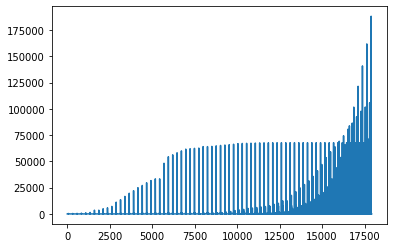

In [49]:
plt.plot(ss)